<a href="https://colab.research.google.com/github/elliothebert/quantitative-analysis/blob/main/Classification_champignons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [28]:
df = pd.read_csv('/content/drive/MyDrive/output/secondary_data.csv', sep=';') 
df.head(10)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,...,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,...,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,...,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,...,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,...,s,y,w,u,w,t,p,NaN,d,w


In [29]:
df.shape

(61069, 21)

In [30]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [31]:
to_drop = ['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color', 'gill-spacing']
df = df.drop(to_drop, axis=1)
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w


In [32]:
df.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-color               object
stem-height             float64
stem-width              float64
stem-color               object
has-ring                 object
ring-type                object
habitat                  object
season                   object
dtype: object

In [33]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
dtype: int64

In [34]:
df = df.dropna()
df.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [35]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

categorical_variables = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']
df[categorical_variables] = df[categorical_variables].apply(le.fit_transform)
df.head()



,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,15.26,6,2,6,0,2,10,16.95,17.09,10,1,2,0,3
1,1,16.60,6,2,6,0,2,10,17.99,18.19,10,1,2,0,2
2,1,14.07,6,2,6,0,2,10,17.80,17.74,10,1,2,0,3
3,1,14.17,2,3,1,0,2,10,15.77,15.98,10,1,4,0,3
4,1,14.64,6,3,6,0,2,10,16.53,17.20,10,1,4,0,3


In [10]:
numerical_variables = df.loc[:, ['cap-diameter', 'stem-height', 'stem-width']]


scaling = MinMaxScaler()
#scaler = MinMaxScaler().fit(numerical_variables)
df[numerical_variables] = scaling.fit_transform(numerical_variables)

df.head()

TypeError: ignored

In [36]:
from sklearn.preprocessing import scale

df[['cap-diameter', 'stem-height', 'stem-width']] = df[['cap-diameter', 'stem-height', 'stem-width']].apply(
                           lambda x: scale(x))
df.head()


#from sklearn.preprocessing import scale
#y = scale(y)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,1.331757,6,2,6,0,2,10,3.232512,0.393944,10,1,2,0,3
1,1,1.553037,6,2,6,0,2,10,3.553583,0.491697,10,1,2,0,2
2,1,1.135246,6,2,6,0,2,10,3.494925,0.451707,10,1,2,0,3
3,1,1.151759,2,3,1,0,2,10,2.868221,0.295302,10,1,4,0,3
4,1,1.229373,6,3,6,0,2,10,3.102849,0.403719,10,1,4,0,3


In [37]:
from sklearn.model_selection import train_test_split

X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((29652, 14), (7413, 14))

In [32]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train, y_train, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1527/1527 [==============================] - 9s 5ms/step - loss: 0.6942 - accuracy: 0.5685 - precision: 0.5670 - recall: 0.9339
Epoch 2/100
1527/1527 [==============================] - 8s 5ms/step - loss: 0.6811 - accuracy: 0.5636 - precision: 0.5599 - recall: 0.9895
Epoch 3/100
1527/1527 [==============================] - 7s 5ms/step - loss: 0.6826 - accuracy: 0.5601 - precision: 0.5573 - recall: 1.0000
Epoch 4/100
1527/1527 [==============================] - 7s 5ms/step - loss: 0.6834 - accuracy: 0.5596 - precision: 0.5572 - recall: 0.9957
Epoch 5/100
1527/1527 [==============================] - 7s 4ms/step - loss: 0.6827 - accuracy: 0.5601 - precision: 0.5573 - recall: 1.0000
Epoch 6/100
1527/1527 [==============================] - 7s 4ms/step - loss: 0.6827 - accuracy: 0.5601 - precision: 0.5573 - recall: 1.0000
Epoch 7/100
1527/1527 [==============================] - 8s 5ms/step - loss: 0.6827 - accuracy: 0.5601 - precision: 0.5573 - recall: 1.0000
Epoch 8/100
1527/152

KeyboardInterrupt: ignored

In [41]:
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(256, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(256, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy', ])

# Fit the model
history = model_7.fit(X_train, y_train, epochs=30, callbacks=[lr_scheduler], verbose=1)

Epoch 1/30
927/927 [==============================] - 5s 5ms/step - loss: 0.6359 - accuracy: 0.6163 - lr: 1.0000e-04
Epoch 2/30
927/927 [==============================] - 4s 4ms/step - loss: 0.5236 - accuracy: 0.7273 - lr: 1.1220e-04
Epoch 3/30
927/927 [==============================] - 5s 5ms/step - loss: 0.4023 - accuracy: 0.8148 - lr: 1.2589e-04
Epoch 4/30
927/927 [==============================] - 5s 5ms/step - loss: 0.2929 - accuracy: 0.8777 - lr: 1.4125e-04
Epoch 5/30
927/927 [==============================] - 5s 5ms/step - loss: 0.2145 - accuracy: 0.9160 - lr: 1.5849e-04
Epoch 6/30
927/927 [==============================] - 5s 5ms/step - loss: 0.1588 - accuracy: 0.9399 - lr: 1.7783e-04
Epoch 7/30
927/927 [==============================] - 5s 5ms/step - loss: 0.1290 - accuracy: 0.9520 - lr: 1.9953e-04
Epoch 8/30
927/927 [==============================] - 4s 5ms/step - loss: 0.1009 - accuracy: 0.9625 - lr: 2.2387e-04
Epoch 9/30
927/927 [==============================] - 4s 4ms/ste

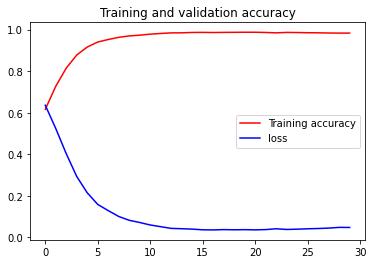

<Figure size 432x288 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
learningrate = history.history['lr']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#plt.plot(epochs, loss, 'r', label='Training Loss')
#lt.plot(epochs, val_loss, 'b', label='Validation Loss')
#plt.title('Training and validation loss')
#plt.legend()

plt.show()